# Python for Data Science, Level I
### *Session \#8*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Timeseries Data
---

### Warm Ups

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

url = "https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv"
query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"

**Read CSV of timeseries data:**
```python
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')
```

In [3]:
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')

**Sort rows by date:** `df.sort_values('Date', inplace=True)`

**Grab year/month/day of data with partial string index:** 
```python
df.loc['2017']
df.loc['2017-02']
df.loc['2017-02-01']
```

**Grab slice with partial string index:** `df.loc['2017-01':'2017-03']`

**See summary statistics:** `df.describe()`

**Create a basic plot of two column:** 
```
columns = ['Open', 'Close']
plt.plot(df.index, df[columns])
```

### Exercises
---
**1. Create a dataframe** `q1` **with just the stock data from January to April 2014**

In [51]:
q1 = df.loc['2014-01':'2014-03']

**2. Create a line plot of the closing price during Q1**

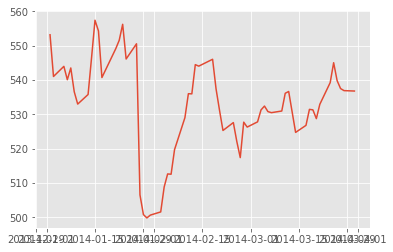

In [81]:
plt.plot(q1.index, q1['Close'])

**3. What was the averaging closing price of AAPL during Q1? How does that compare to the average price for Q1 of 2015?**

In [56]:
df.loc['2014-01':'2014-03']['Close'].mean()

df.loc['2015-01':'2015-03']['Close'].mean()

532.6045655737705

**4. What was the lowest closing price of AAPL in 2015? When did the lowest closing price occur?**

Hint: You can use the Numpy function `.idxmin()` to find the index of the min argument, and likewise for `.idxmax()`

In [59]:
df.loc['2015', 'Close'].min()
df.loc['2015', 'Close'].idxmin()


df.loc['2015', 'Close'].agg(['min', 'idxmin'])

min                    103.12
idxmin    2015-08-24 00:00:00
Name: Close, dtype: object

## II. Intro to Matplotlib

### Warm Ups

---

*Note: Use **ONE** notebook cell per graph*

*Note: Executing things in order matters!*

*Note: This page lists [all base styles](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) supported by Matplotlib.* 

In [99]:
# IMPORT MATPLOTLIB (ONCE PER NOTEBOOK)
# import matplotlib.pyplot as plt



# TURN ON INLINE GRAPHS (ONCE PER NOTEBOOK)
# %matplotlib inline



# CHOOSE STYLE (ONCE PER NOTEBOOK)
# plt.style.use('seaborn')



# SET SIZE OF GRAPH (INCHES)
# plt.figure(figsize=(12,6))



# DRAW PLOT
# plt.plot(df.index, df['Open'])



# ADD LEGEND TO PLOT (OPTIONAL: LIST OF STRINGS FOR LABELS)
# plt.legend()



# SAVE PLOT TO HARDDRIVE
# plt.savefig("example.jpg")

### Exercises
---
**1. Choose a different style and plot the** `Close` **column over December of 2016**

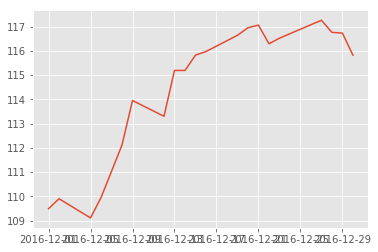

In [69]:
plt.style.use('ggplot')
dec = df.loc['2016-12', 'Close']
plt.plot(dec.index, dec)

**2. The second input to** `plt.plot()` **can be a dataframe as well.**

**Create a new dataframe with just the** `High` **and** `Low` **columns and plot this over January 2015.** 

**Add a legend, with the labels** `Highest Price` **and** `Lowest Price` 

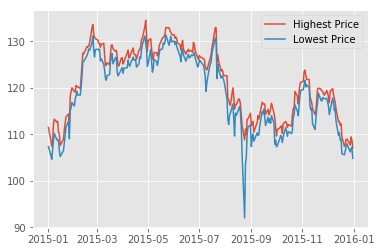

In [70]:
columns = ['High', 'Low']
jan = df.loc['2015', columns]

plt.plot(jan.index, jan)
plt.legend(['Highest Price', 'Lowest Price'])

**3. Create a new** `Variation` **column which captures the difference between** `Close` **and** `Open` **as a positive number, i.e. absolute value.**

*Hint: To get absolute value, use Numpy array's .abs() method*

In [44]:
df['Variation'] = (df['Close'] - df['Open']).abs()

**4. Do a groupby on** `df.index.month` **to total up volume per month. Save the output dataframe as** `volume`

In [9]:
volume = df.groupby(df.index.month)['Volume'].sum()

## III. More Matplotlib

### Warm Ups

---

*NOTE: Can set `fontsize` and `fontname` on any of these methods*

([<matplotlib.axis.XTick at 0x1081b9c18>,
 <a list of 12 Text xticklabel objects>)

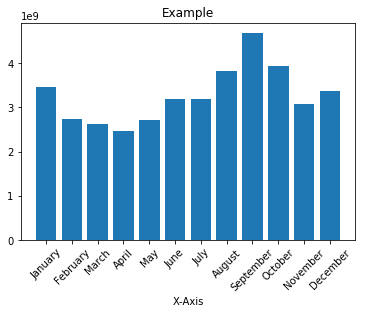

In [10]:
# IMPORT PACKAGE TO HELP WITH MONTH/DAY NAMES
# import calendar
# months = calendar.month_name[1:]
# days = calendar.day_name
import calendar
months = calendar.month_name[1:]
days = calendar.day_name
# CREATE BAR CHART 
# plt.bar(volume.index, volume)
plt.bar(volume.index, volume)

# ADD TITLE
# plt.title('Example')
plt.title('Example')

# CHANGE X-AXIS LABEL
# plt.xlabel("X-Axis")
plt.xlabel('X-Axis')

# CHANGE TICK LABELS 
# plt.xticks(volume.index, months, rotation=90)
plt.xticks(volume.index, months, rotation=45)

### Exercises
---

**1. Create a bar graph of** `volume` **with proper title, figure size, and y-axis label** 

Text(0, 0.5, '100s of Millions of Transactions')

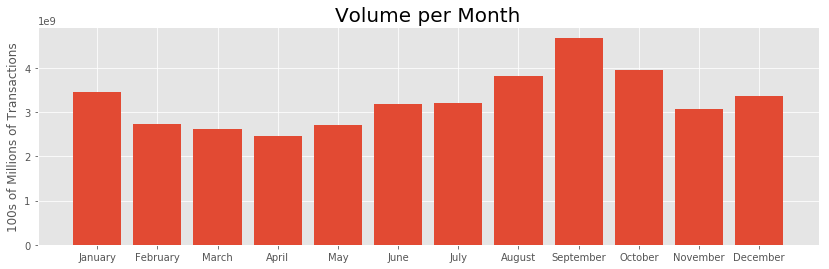

In [71]:
plt.figure(figsize=(14, 4))
plt.bar(volume.index, volume)
plt.xticks(volume.index, labels=calendar.month_name[1:])
plt.title('Volume per Month', fontsize=20)
plt.ylabel("100s of Millions of Transactions")

**2. Create a dataframe named** `monthly_change` **by grouping** `df` **by** `df.index.month` **and summing up the** `Change` **column**

([<matplotlib.axis.XTick at 0x117d96080>,
 <a list of 12 Text xticklabel objects>)

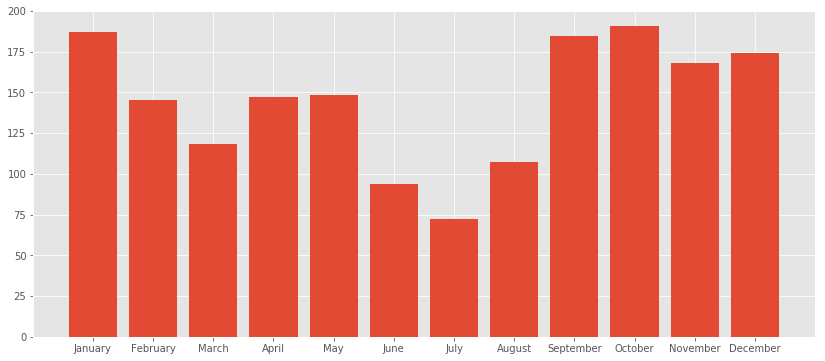

In [72]:
plt.figure(figsize=(14, 6))
monthly_change = df.groupby(df.index.month)['Absolute Change'].sum()
plt.bar(monthly_change.index, monthly_change)
plt.xticks(monthly_change.index, months)

**3. Create a dataframe named** `daily_volume` **by grouping** `df` **by** `df.index.dayofweek` **and summing up the** `Volume` **column.**

**Use** `plt.barh()` **to plot it as a horizontal bar chart, and** `plt.yticks()` **to label the y-axis**

([<matplotlib.axis.YTick at 0x10823b240>,
 <a list of 5 Text yticklabel objects>)

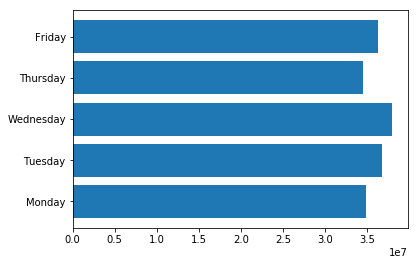

In [11]:
week_volume = df.groupby(df.index.dayofweek)['Volume'].mean()
plt.barh(week_volume.index, week_volume)
plt.yticks(week_volume.index, calendar.day_name)

### Extra Credit

**5. Define a function that will visualize a given stock over a date range.**

In [79]:
def graph_stock(symbol, start, end):
    url = f"https://www.quandl.com/api/v3/datasets/EOD/{symbol}.csv"
    query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"
    df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')
    df.sort_values('Date', inplace=True)
    range_df = df.loc[start:end]
    plt.figure(figsize=(12, 6))
    plt.plot(range_df.index, range_df['Close'])
    plt.xticks(rotation=45)

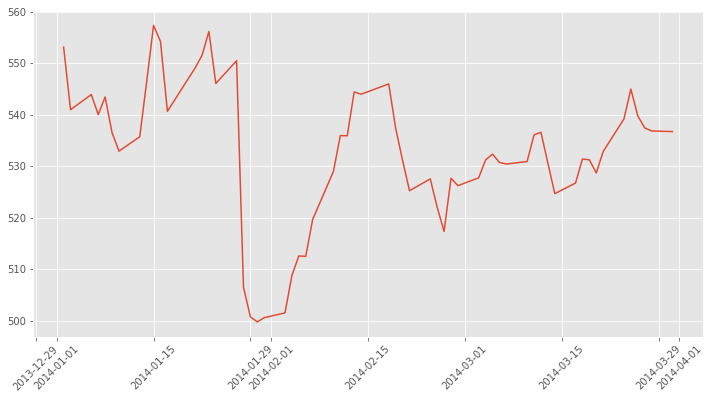

In [80]:
graph_stock('AAPL', '2014-01', '2014-03')